In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.9 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Dataset visualization only

In [ ]:
# Load and preprocess your dataset
import pandas as pd
dataset = pd.read_csv('input.csv')
dataset

,Annotation ID,Text,Term
0,1761,निजी क्षेत्रलाई हेर्ने नजरिया फेर्ने चन्द्र ढक...,"['निजी क्षेत्र:neutral', 'चन्द्र ढकाल:positive..."
1,1762,यी हुन् महासंघमा चन्द्र ढकालका सारथीहरू,['चन्द्र ढकाल:neutral']
2,1763,समिट होटलको परियोजना हाम्रो मात्र होइन: सीजी ड...,"['समिट होटल:positive', 'सीजी डेभलपर्स:positive']"
3,1764,"'बिचरा' विनोद चौधरी, कसरी गर्लान् कठै त्यत्रा ...",['विनोद चौधरी:negative']
4,1765,कतारमा हुने दशौँ अन्तर्राष्ट्रिय कृषि प्रदर्शन...,"['कतार:neutral', 'अन्तर्राष्ट्रिय कृषि प्रदर्श..."
...,...,...,...
141,1902,"चिया नबिकेपछि सडकमै पोखे किसानले हरियोपत्ती, ५...","['चिया:negative', 'चिया कारखाना:negative']"
142,1903,"अर्को चिनिया सिमेन्ट संचालनको तयारी, २०४ जना क...","['चिनिया सिमेन्ट:neutral', 'कर्मचारी:positive']"
143,1904,भ्याटमा दर्ता हुन यी व्यवसायलाई विभागको उर्दि,['व्यवसाय:positive']
144,1905,"ढुवानी कर वृद्धि नगर्न माग, 'क्यासिनो बन्द गरि...","['ढुवानी कर:neutral', 'क्यासिनो:negative']"


to drop row with no annotation

In [ ]:
import pandas as pd
dataset = pd.read_csv('input.csv', encoding='utf-8-sig')

# Drop rows with an empty term
dataset = dataset[~dataset['Term'].apply(lambda x: len(eval(x)) == 0)]

dataset.to_csv('updated_input.csv', index=False)

# Aspect term extractor


In [ ]:
#for nepali aspect term extractor
aspect_terms_list = []

# Iterate over the rows in the DataFrame
for index, row in dataset.iterrows():
    text = row['Text']
    term = row['Term']

    # Extract aspect terms from the "Term" column
    aspect_terms = eval(term)

    # Extract the terms without sentiment labels
    aspect_terms = [term.split(':')[0] for term in aspect_terms]

    # Extend the aspect terms list
    aspect_terms_list.extend(aspect_terms)

# Remove repeated terms from the aspect terms list
aspect_terms_list = list(set(aspect_terms_list))

# Create a DataFrame with aspect terms
df_aspect_terms = pd.DataFrame({'Term': aspect_terms_list})

# Save the DataFrame as a CSV file
output_file_path = "aspect_terms.csv"
df_aspect_terms.to_csv(output_file_path, index=False)
print(f"Aspect terms saved to {output_file_path}")


Aspect terms saved to aspect_terms.csv


In [ ]:
total_count = len(aspect_terms_list)

# Print the total count
print(f"Total number of aspects: {total_count}")

Total number of aspects: 1911


In [ ]:
aspect = pd.read_csv('aspect_terms.csv')
aspect.head(100)

,Term
0,नेसनल लाइफ
1,जीवन बीमालेख
2,प्रतिफल
3,कालिका पावर
4,बाख्रा बीमालेख
...,...
95,स्वास्थ्य बीमा बोर्ड
96,प्रुडेन्सियल इन्स्योरेन्स
97,इसामु जापानिज रेष्टुरेन्ट
98,हिप्को सुपरबिल्ड स्टिल


# Aspect Term Extractor along with counts


Aspect Term Counts:
गण्डकी: 1
दाङ: 4
धान: 14
अर्थतन्त्र: 5
गोठाला: 1
सिंजाली: 1
किसान: 68
कुलो: 1
खेत: 1
पोखरा महानगरपालिका: 2
चुच्चेखोला: 1
भारत: 7
नेपाली: 8
अण्डा: 4
रासायनिक मल: 9
माछापालन: 2
गोलभेँडा: 3
मूल्य: 4
पशु बधशाला: 1
महावीर पुन: 1
कारखाना: 2
गाई फार्म: 1
बाहुनडाँगी: 1
कृषक: 21
अम्रिसो निकासी: 1
आयातित वस्तु: 1
स्थानीय: 2
ड्रागन खेती: 2
उखु किसान: 3
अवैध रासायनिक मल: 1
कालोबजारी: 1
पशु: 2
बिरुवा: 2
बजेट: 5
नेपाल: 15
शेयर: 4
ब्रोकर: 1
एग्रोभेट: 1
ढोडेनी: 1
तनहुँ: 2
दूध: 7
सनराइज बैंक: 26
आँप: 4
सरकार: 16
कृषि: 15
मन्त्रालय: 1
कार्यक्रम: 7
उत्पादन: 5
म्याग्दी: 2
भान्सा: 1
कैलाली: 2
बन्दागोभी: 1
गाई: 1
गहत खेती: 1
स्वदेश: 4
वीरेन्द्रबहादुर बस्नेत: 1
चीज: 1
गुरुङ: 1
तरकारी: 13
विदेश: 4
काँकडभिट्टा: 1
बन्दाकोभी: 1
बाली: 4
भाइ: 1
सुन्तला बगैँचा: 1
मकै बाली: 1
परिचयपत्र: 1
जग्गा कित्ताकाट: 1
अक्षय कुमार: 1
वीरेन्द्र सहवाग: 1
आलु उत्पादन: 1
धान खेती: 1
इन्धन: 2
रसायनिक मल: 2
मल: 4
आलु: 3
खेती: 1
पोखरा महानगर: 1
विपन्न बस्ती: 1
तरकारी खेती: 3
जैविक मल: 1
स्ट्रबेरी: 1
तरकारी काका: 1


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2339 (\N{DEVANAGARI LETTER NNA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2337 (\N{DEVANAGARI LETTER DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

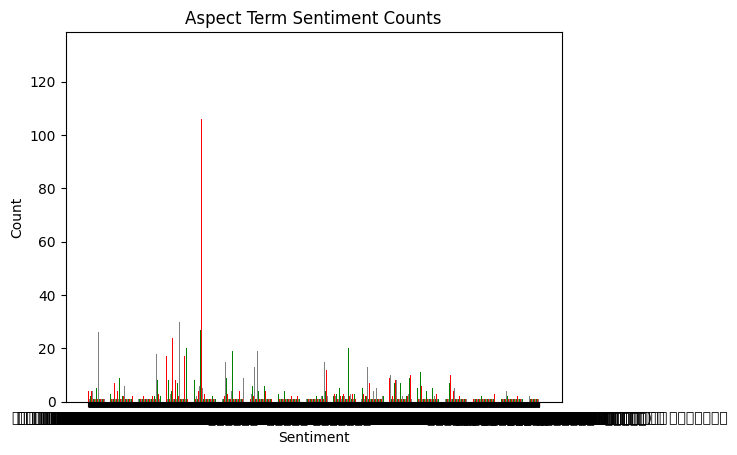

In [ ]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset
# dataset = pd.read_csv('input.csv')

# Drop rows with missing values (NaN) in the 'Term' column
dataset = dataset.dropna(subset=['Term'])

# Aspect term counter dictionary with default value 0
aspect_terms_count = defaultdict(int)

# Iterate over the rows in the DataFrame
for _, row in dataset.iterrows():
    term_list = eval(row['Term'])
    aspect_terms = [term.split(':')[0].strip() for term in term_list]

    # Count the aspect terms by sentiment
    for term in aspect_terms:
        aspect_terms_count[term] += 1

# Calculate the total aspect term count
total_aspect_count = sum(aspect_terms_count.values())

# Print aspect terms and their counts for debugging
print("Aspect Term Counts:")
for term, count in aspect_terms_count.items():
    print(f"{term}: {count}")

print(f"Total Aspect Count: {total_aspect_count}")

# Create a DataFrame with aspect term counts
df_aspect_terms_count = pd.DataFrame.from_dict(aspect_terms_count, orient='index', columns=['Count'])

# Plot the aspect term counts
plt.bar(df_aspect_terms_count.index, df_aspect_terms_count['Count'], color=['green', 'red', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Aspect Term Sentiment Counts')
plt.show()


Aspect Sentiment Counts:
positive: 2367
neutral: 2408
negative: 603
Total Aspect Sentiment Count: 5378
Total Positive Aspect Sentiment Count: 2367
Total Negative Aspect Sentiment Count: 603
Total Neutral Aspect Sentiment Count: 2408


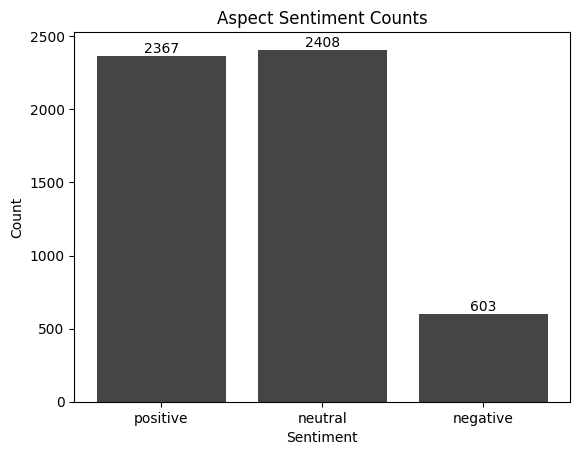

In [ ]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset
# dataset = pd.read_csv('input.csv')

# Drop rows with missing values (NaN) in the 'Term' column
dataset = dataset.dropna(subset=['Term'])

# Aspect sentiment counter dictionary with default value 0
aspect_sentiments_count = defaultdict(int)

# Iterate over the rows in the DataFrame
for _, row in dataset.iterrows():
    term_list = eval(row['Term'])
    for term in term_list:
        sentiment = term.split(':')[1].strip()
        aspect_sentiments_count[sentiment] += 1

# Calculate the total aspect sentiment count
total_aspect_sentiment_count = sum(aspect_sentiments_count.values())

# Calculate the counts for positive, negative, and neutral aspect sentiments
positive_count = aspect_sentiments_count['positive']
negative_count = aspect_sentiments_count['negative']
neutral_count = aspect_sentiments_count['neutral']

# Print aspect sentiments and their counts
print("Aspect Sentiment Counts:")
for sentiment, count in aspect_sentiments_count.items():
    print(f"{sentiment}: {count}")

print(f"Total Aspect Sentiment Count: {total_aspect_sentiment_count}")
print(f"Total Positive Aspect Sentiment Count: {positive_count}")
print(f"Total Negative Aspect Sentiment Count: {negative_count}")
print(f"Total Neutral Aspect Sentiment Count: {neutral_count}")

# Create a DataFrame with aspect sentiment counts
df_aspect_sentiments_count = pd.DataFrame.from_dict(aspect_sentiments_count, orient='index', columns=['Count'])

# Plot the aspect sentiment counts
plt.bar(df_aspect_sentiments_count.index, df_aspect_sentiments_count['Count'], color=['#454545', '#454545', '#454545'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Aspect Sentiment Counts')
# Add count labels on top of each bar
for i, count in enumerate(df_aspect_sentiments_count['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


Sentences with Single Aspect: 3393
Sentences with Multiple Aspects: 958
Sentiment counts for Single Aspect sentences:
positive: 1550
neutral: 1526
negative: 317
Sentiment counts for Multiple Aspect sentences:
negative: 286
neutral: 882
positive: 817


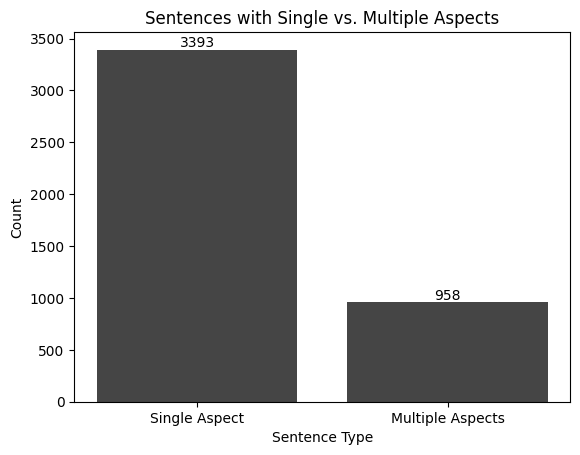

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Drop rows with missing values (NaN) in the 'Term' column
# dataset = dataset.dropna(subset=['Term'])

# # Initialize counters for single and multiple aspects
# single_aspect_count = 0
# multiple_aspect_count = 0

# # Iterate over the rows in the DataFrame
# for _, row in dataset.iterrows():
#     term_list = eval(row['Term'])
#     aspects = [term.split(':')[0].strip() for term in term_list]

#     # Categorize sentences based on the number of aspects
#     if len(aspects) == 1:
#         single_aspect_count += 1
#     elif len(aspects) > 1:
#         multiple_aspect_count += 1

# # Print the counts for sentences with single and multiple aspects
# print(f"Sentences with Single Aspect: {single_aspect_count}")
# print(f"Sentences with Multiple Aspects: {multiple_aspect_count}")

# # Plot the counts for single and multiple aspects
# plt.bar(['Single Aspect', 'Multiple Aspects'], [single_aspect_count, multiple_aspect_count], color='blue')
# plt.xlabel('Sentence Type')
# plt.ylabel('Count')
# plt.title('Sentences with Single vs. Multiple Aspects')
# plt.show()



import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values (NaN) in the 'Term' column
dataset = dataset.dropna(subset=['Term'])

# Initialize counters for single and multiple aspects
single_aspect_count = 0
multiple_aspect_count = 0

# Initialize dictionaries to store sentiment counts for single and multiple aspects
single_aspect_sentiment_counts = {}
multiple_aspect_sentiment_counts = {}

# Iterate over the rows in the DataFrame
for _, row in dataset.iterrows():
    term_list = eval(row['Term'])
    aspects = [term.split(':')[0].strip() for term in term_list]
    sentiments = [term.split(':')[1].strip() for term in term_list]

    # Categorize sentences based on the number of aspects
    if len(aspects) == 1:
        single_aspect_count += 1
        sentiment = sentiments[0]

        # Update the sentiment count for single aspect sentences
        if sentiment in single_aspect_sentiment_counts:
            single_aspect_sentiment_counts[sentiment] += 1
        else:
            single_aspect_sentiment_counts[sentiment] = 1
    elif len(aspects) > 1:
        multiple_aspect_count += 1

        # Update the sentiment count for multiple aspect sentences
        for sentiment in sentiments:
            if sentiment in multiple_aspect_sentiment_counts:
                multiple_aspect_sentiment_counts[sentiment] += 1
            else:
                multiple_aspect_sentiment_counts[sentiment] = 1

# Print the counts for sentences with single and multiple aspects
print(f"Sentences with Single Aspect: {single_aspect_count}")
print(f"Sentences with Multiple Aspects: {multiple_aspect_count}")

# Print the sentiment counts for single aspect sentences
print("Sentiment counts for Single Aspect sentences:")
for sentiment, count in single_aspect_sentiment_counts.items():
    print(f"{sentiment}: {count}")

# Print the sentiment counts for multiple aspect sentences
print("Sentiment counts for Multiple Aspect sentences:")
for sentiment, count in multiple_aspect_sentiment_counts.items():
    print(f"{sentiment}: {count}")

# Plot the counts for single and multiple aspects
plt.bar(['Single Aspect', 'Multiple Aspects'], [single_aspect_count, multiple_aspect_count], color='#454545')
plt.xlabel('Sentence Type')
plt.ylabel('Count')
plt.title('Sentences with Single vs. Multiple Aspects')
# Add count labels on top of each bar
for i, count in enumerate([single_aspect_count, multiple_aspect_count]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


Total Single Word Aspect Count: 1365
Total Multiple Word Aspect Count: 4013


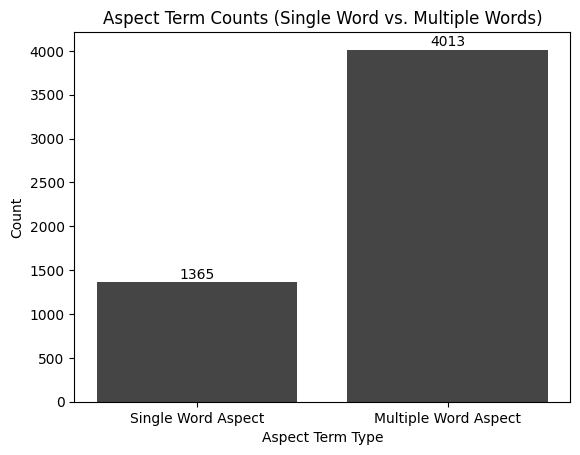

In [ ]:

# from collections import defaultdict
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming you have already loaded your dataset
# # dataset = pd.read_csv('input.csv')

# # Drop rows with missing values (NaN) in the 'Term' column
# dataset = dataset.dropna(subset=['Term'])

# # Initialize aspect term counters for single-word and multi-word aspect terms
# single_word_aspect_count = defaultdict(int)
# multiple_word_aspect_count = defaultdict(int)

# # Iterate over the rows in the DataFrame
# for _, row in dataset.iterrows():
#     term_list = eval(row['Term'])
#     aspect_terms = [term.split(':')[0].strip() for term in term_list]

#     # Count the aspect terms by their word count
#     for term in aspect_terms:
#         word_count = len(term.split())
#         if word_count == 1:
#             single_word_aspect_count[term] += 1
#         else:
#             multiple_word_aspect_count[term] += 1

# # Create a DataFrame with aspect term counts for single-word and multi-word aspect terms
# df_single_word_aspect_count = pd.DataFrame.from_dict(single_word_aspect_count, orient='index', columns=['Single_Word_Count'])
# df_multiple_word_aspect_count = pd.DataFrame.from_dict(multiple_word_aspect_count, orient='index', columns=['Multiple_Word_Count'])

# # Combine the two DataFrames
# df_aspect_counts = df_single_word_aspect_count.join(df_multiple_word_aspect_count, how='outer').fillna(0)

# # Plot the aspect term counts for single-word and multi-word aspect terms
# df_aspect_counts.plot(kind='bar', color=['green', 'red'])
# plt.xlabel('Aspect Term')
# plt.ylabel('Count')
# plt.title('Aspect Term Counts (Single Word vs. Multiple Words)')
# plt.legend(title='Aspect Type', labels=['Single Word', 'Multiple Words'])
# plt.show()


import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset
# dataset = pd.read_csv('input.csv')

# Drop rows with missing values (NaN) in the 'Term' column
dataset = dataset.dropna(subset=['Term'])

# Initialize counters for single-word and multi-word aspect terms
single_word_aspect_count = 0
multiple_word_aspect_count = 0

# Iterate over the rows in the DataFrame
for _, row in dataset.iterrows():
    term_list = eval(row['Term'])
    for term in term_list:
        aspect_term = term.split(':')[0].strip()
        word_count = len(aspect_term.split())
        if word_count == 1:
            single_word_aspect_count += 1
        else:
            multiple_word_aspect_count += 1

# Print the total count of single-word and multi-word aspect terms
print(f"Total Single Word Aspect Count: {single_word_aspect_count}")
print(f"Total Multiple Word Aspect Count: {multiple_word_aspect_count}")

# Plot the total count of single-word and multi-word aspect terms
plt.bar(['Single Word Aspect', 'Multiple Word Aspect'], [single_word_aspect_count, multiple_word_aspect_count], color=['#454545', '#454545'])
plt.xlabel('Aspect Term Type')
plt.ylabel('Count')
plt.title('Aspect Term Counts (Single Word vs. Multiple Words)')

# Add counts on top of the bars
for i, count in enumerate([single_word_aspect_count, multiple_word_aspect_count]):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')
plt.show()



#IBO encoding






In [ ]:
# Load and preprocess your dataset
import pandas as pd
dataset = pd.read_csv('input.csv')
dataset

,Annotation ID,Text,Term
0,1761,निजी क्षेत्रलाई हेर्ने नजरिया फेर्ने चन्द्र ढक...,"['निजी क्षेत्र:neutral', 'चन्द्र ढकाल:positive..."
1,1762,यी हुन् महासंघमा चन्द्र ढकालका सारथीहरू,['चन्द्र ढकाल:neutral']
2,1763,समिट होटलको परियोजना हाम्रो मात्र होइन: सीजी ड...,"['समिट होटल:positive', 'सीजी डेभलपर्स:positive']"
3,1764,"'बिचरा' विनोद चौधरी, कसरी गर्लान् कठै त्यत्रा ...",['विनोद चौधरी:negative']
4,1765,कतारमा हुने दशौँ अन्तर्राष्ट्रिय कृषि प्रदर्शन...,"['कतार:neutral', 'अन्तर्राष्ट्रिय कृषि प्रदर्श..."
...,...,...,...
141,1902,"चिया नबिकेपछि सडकमै पोखे किसानले हरियोपत्ती, ५...","['चिया:negative', 'चिया कारखाना:negative']"
142,1903,"अर्को चिनिया सिमेन्ट संचालनको तयारी, २०४ जना क...","['चिनिया सिमेन्ट:neutral', 'कर्मचारी:positive']"
143,1904,भ्याटमा दर्ता हुन यी व्यवसायलाई विभागको उर्दि,['व्यवसाय:positive']
144,1905,"ढुवानी कर वृद्धि नगर्न माग, 'क्यासिनो बन्द गरि...","['ढुवानी कर:neutral', 'क्यासिनो:negative']"


In [ ]:
import pandas as pd
dataset = pd.read_csv('input.csv', encoding='utf-8-sig')
# Drop rows with an empty term
dataset = dataset[~dataset['Term'].apply(lambda x: len(eval(x)) == 0)]
dataset.to_csv('input1.csv', index=False)

stemming

In [ ]:
import pandas as pd
from snowballstemmer import stemmer

nepali_stemmer = stemmer("nepali")

def stem_sentence(sentence):
    words = sentence.split()
    stemmed_words = []
    for word in words:
        stemmed_word = nepali_stemmer.stemWord(word)
        stemmed_words.append(stemmed_word)
    stemmed_sentence = " ".join(stemmed_words)
    return stemmed_sentence

# Read the data from the CSV file
df = pd.read_csv("input1.csv")

# Apply stemming to the 'Text' column and create a new column 'Text_Stemmed'
df['Text_Stemmed'] = df['Text'].apply(stem_sentence)

# Save the results to a new CSV file
df.to_csv("input_stemmed.csv", index=False)

print(df)

     Annotation ID                                               Text  \
0             1761  निजी क्षेत्रलाई हेर्ने नजरिया फेर्ने चन्द्र ढक...   
1             1762            यी हुन् महासंघमा चन्द्र ढकालका सारथीहरू   
2             1763  समिट होटलको परियोजना हाम्रो मात्र होइन: सीजी ड...   
3             1764  'बिचरा' विनोद चौधरी, कसरी गर्लान् कठै त्यत्रा ...   
4             1765  कतारमा हुने दशौँ अन्तर्राष्ट्रिय कृषि प्रदर्शन...   
..             ...                                                ...   
141           1902  चिया नबिकेपछि सडकमै पोखे किसानले हरियोपत्ती, ५...   
142           1903  अर्को चिनिया सिमेन्ट संचालनको तयारी, २०४ जना क...   
143           1904      भ्याटमा दर्ता हुन यी व्यवसायलाई विभागको उर्दि   
144           1905  ढुवानी कर वृद्धि नगर्न माग, 'क्यासिनो बन्द गरि...   
145           1906  राजश्व अनुसन्धानको फँन्दामा तीन व्यापारी, दोष ...   

                                                  Term  \
0    ['निजी क्षेत्र:neutral', 'चन्द्र ढकाल:positive...   
1      

Drop column that is not needed

In [ ]:
import pandas as pd
from snowballstemmer import stemmer

nepali_stemmer = stemmer("nepali")

def stem_sentence(sentence):
    words = sentence.split()
    stemmed_words = []
    for word in words:
        stemmed_word = nepali_stemmer.stemWord(word)
        stemmed_words.append(stemmed_word)
    stemmed_sentence = " ".join(stemmed_words)
    return stemmed_sentence

# Read the data from the CSV file
df = pd.read_csv("input_stemmed.csv")

# Apply stemming to the 'Text' column and create a new column 'Text_Stemmed'
df['Text_Stemmed'] = df['Text'].apply(stem_sentence)

# Save only the 'Text_Stemmed' and 'Term' columns to a new CSV file named "output.csv"
df[['Text_Stemmed', 'Term']].to_csv("input_final.csv", index=False)

print(df[['Text_Stemmed', 'Term']])


                                          Text_Stemmed  \
0    निजी क्षेत्र हेर् नजरिया फेर् चन्द्र ढकाल घोषण...   
1                       यी हुन् महासंघ चन्द्र ढकाल सार   
2    समिट होटल परियोजना हाम्रो मात्र होइन: सीजी डेभ...   
3    'बिचरा' विनोद चौधरी, कसरी गर् कठै त्यत्रा घर म...   
4    कतार हु दशौँ अन्तर्राष्ट्रिय कृषि प्रदर्शनी ने...   
..                                                 ...   
141  चिया नबिके सडक पोखे किसान हरियोपत्ती, ५२ चिया ...   
142  अर् चिनिया सिमेन्ट संचालन तयारी, २०४ जना कर्मच...   
143             भ्याट दर्ता हुन यी व्यवसाय विभाग उर्दि   
144  ढुवानी कर वृद्धि नगर्न माग, 'क्यासिनो बन्द गरि...   
145  राजश्व अनुसन्धान फँन् तीन व्यापारी, दोष प्रमाण...   

                                                  Term  
0    ['निजी क्षेत्र:neutral', 'चन्द्र ढकाल:positive...  
1                              ['चन्द्र ढकाल:neutral']  
2     ['समिट होटल:positive', 'सीजी डेभलपर्स:positive']  
3                             ['विनोद चौधरी:negative']  
4    ['कतार:neutra

In [ ]:
df = pd.read_csv('/content/input_final.csv')
df.head()

,Text_Stemmed,Term
0,निजी क्षेत्र हेर् नजरिया फेर् चन्द्र ढकाल घोषण...,"['निजी क्षेत्र:neutral', 'चन्द्र ढकाल:positive..."
1,यी हुन् महासंघ चन्द्र ढकाल सार,['चन्द्र ढकाल:neutral']
2,समिट होटल परियोजना हाम्रो मात्र होइन: सीजी डेभ...,"['समिट होटल:positive', 'सीजी डेभलपर्स:positive']"
3,"'बिचरा' विनोद चौधरी, कसरी गर् कठै त्यत्रा घर म...",['विनोद चौधरी:negative']
4,कतार हु दशौँ अन्तर्राष्ट्रिय कृषि प्रदर्शनी ने...,"['कतार:neutral', 'अन्तर्राष्ट्रिय कृषि प्रदर्श..."


# IBO encoding


convert to IBO

In [ ]:
#use this
import csv

def format_data(texts, annotations, terms):
    formatted_data = []
    for text, annotation, term in zip(texts, annotations, terms):
        tokens = text.split()
        tags = ['O'] * len(tokens)  # Initialize all tags as 'O' (Outside)

        aspect_terms = eval(annotation)  # Parse the annotation string

        if len(aspect_terms) > 0:
            for aspect_term in aspect_terms:
                aspect_text, aspect_sentiment = aspect_term.split(':')
                aspect_text_tokens = aspect_text.split()

                # Find the start index of the aspect term in the tokenized text
                start_index = find_term_index(tokens, aspect_text_tokens, match_type='start')

                # Check if the index is within range
                if start_index is not None and start_index < len(tokens):
                    tags[start_index] = 'B-' + aspect_sentiment
                    for i in range(1, len(aspect_text_tokens)):
                        next_index = start_index + i
                        if next_index < len(tokens):
                            tags[next_index] = 'I-' + aspect_sentiment  # Set tags for inside tokens as 'I-SENTIMENT'

        # Add the tokenized text, corresponding tags, and original term to the formatted data
        formatted_data.append((tokens, tags, term))

    return formatted_data

def find_term_index(tokens, term_tokens, match_type='start'):
    token_index = None
    for i in range(len(tokens) - len(term_tokens) + 1):
        if tokens[i:i+len(term_tokens)] == term_tokens:
            token_index = i
            if match_type == 'start':
                break
    return token_index

def read_data_from_csv(file_path):
    texts = []
    annotations = []
    terms = []
    with open(file_path, 'r', encoding='utf-8') as csv_file:
        reader = csv.DictReader(csv_file)
        for row in reader:
            texts.append(row['Text_Stemmed'])
            annotations.append(row['Term'])
            terms.append(row['Term'])
    return texts, annotations, terms

def write_data_to_csv(file_path, formatted_data):
    with open(file_path, 'w', encoding='utf-8', newline='') as csv_file:
        fieldnames = ['Text', 'Tags', 'Term']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        for tokens, tags, term in formatted_data:
            text = ' '.join(tokens)
            writer.writerow({'Text': text, 'Tags': ' '.join(tags), 'Term': term})

# Example usage
input_file = 'input_final.csv'
output_file = 'output_with_multi_entity.csv'
texts, annotations, terms = read_data_from_csv(input_file)
formatted_data = format_data(texts, annotations, terms)
write_data_to_csv(output_file, formatted_data)


In [ ]:
df = pd.read_csv('output_with_multi_entity.csv')
df

,Text,Tags,Term
0,निजी क्षेत्र हेर् नजरिया फेर् चन्द्र ढकाल घोषण...,B-neutral I-neutral O O O B-positive I-positiv...,"['निजी क्षेत्र:neutral', 'चन्द्र ढकाल:positive..."
1,यी हुन् महासंघ चन्द्र ढकाल सार,O O O B-neutral I-neutral O,['चन्द्र ढकाल:neutral']
2,समिट होटल परियोजना हाम्रो मात्र होइन: सीजी डेभ...,B-positive I-positive O O O O B-positive I-pos...,"['समिट होटल:positive', 'सीजी डेभलपर्स:positive']"
3,"'बिचरा' विनोद चौधरी, कसरी गर् कठै त्यत्रा घर म...",O O O O O O O O O O,['विनोद चौधरी:negative']
4,कतार हु दशौँ अन्तर्राष्ट्रिय कृषि प्रदर्शनी ने...,B-neutral O O B-positive I-positive I-positive...,"['कतार:neutral', 'अन्तर्राष्ट्रिय कृषि प्रदर्श..."
...,...,...,...
141,"चिया नबिके सडक पोखे किसान हरियोपत्ती, ५२ चिया ...",B-negative O O O O O O B-negative I-negative O,"['चिया:negative', 'चिया कारखाना:negative']"
142,"अर् चिनिया सिमेन्ट संचालन तयारी, २०४ जना कर्मच...",O B-neutral I-neutral O O O O B-positive O,"['चिनिया सिमेन्ट:neutral', 'कर्मचारी:positive']"
143,भ्याट दर्ता हुन यी व्यवसाय विभाग उर्दि,O O O O B-positive O O,['व्यवसाय:positive']
144,"ढुवानी कर वृद्धि नगर्न माग, 'क्यासिनो बन्द गरि...",B-neutral I-neutral O O O O O O O,"['ढुवानी कर:neutral', 'क्यासिनो:negative']"


In [ ]:
#not nesessary
import codecs

file_path = 'formatted_IBO.csv'

with codecs.open(file_path, 'r', encoding='utf-8-sig') as file:
    content = file.read()

print(content)


#aspect entity extract

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForTokenClassification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
class AspectTermDataset(Dataset):
    def __init__(self, data, tokenizer, label_encoder, max_length):
      self.data = data
      self.tokenizer = tokenizer
      self.label_encoder = label_encoder
      self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = self.data.loc[idx, 'Text']
        tags = self.data.loc[idx, 'Tags']

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()
        encoded_tags = self.label_encoder.transform(tags)

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'tags': encoded_tags
        }


In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Split the aspect tags and create a list of lists
aspect_tags = aspect_data['Tags'].str.split()

# Fit the LabelEncoder on flattened aspect tags
all_tags = [tag for sublist in aspect_tags for tag in sublist]
label_encoder.fit(all_tags)

# Encode aspect tags using the fitted LabelEncoder
encoded_labels = [[label_encoder.transform([tag])[0] for tag in sublist] for sublist in aspect_tags]

# Update the 'Aspect Tags' column in the aspect_data DataFrame
aspect_data['Tags'] = encoded_labels


In [ ]:
# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-multilingual-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)  # Modify num_labels as per your dataset

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingu

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [ ]:
# Set optimizer and learning rate scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)

In [ ]:
train_data, val_data = train_test_split(aspect_data, test_size=0.2, random_state=42)
train_dataset = AspectTermDataset(train_data, tokenizer,label_encoder, max_length=40)
val_dataset = AspectTermDataset(val_data, tokenizer,label_encoder, max_length=40)

In [ ]:
# Create data loaders
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        tags = batch['tags'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=tags)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_loss:.4f}")

    # Evaluation
    model.eval()
    eval_loss = 0

    with torch.no_grad():
        for batch in val_dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            tags = batch['tags'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=tags)
            loss = outputs.loss
            eval_loss += loss.item()

    avg_eval_loss = eval_loss / len(val_dataloader)
    print(f"Epoch {epoch+1}/{num_epochs} - Validation Loss: {avg_eval_loss:.4f}")


In [ ]:
# Save the trained model
output_model_path = 'AE_model.bin'
torch.save(model.state_dict(), output_model_path)
print(f"Aspect term extractor model saved to {output_model_path}")


#practice model training

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
from transformers import BertModel, BertTokenizer
import re

In [ ]:
def load_data(file_path):
    # Load the data from file (assuming it's in CSV format)
    data = pd.read_csv(file_path)

    # Preprocess the data
    tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')
    input_ids = []
    attention_mask = []
    aspect_labels = []
    sentiment_labels = []

    for text, tags in zip(data['Text'], data['Term']):
        # Tokenize the text
        encoded_text = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=80,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        # Append input IDs and attention masks
        input_ids.append(encoded_text['input_ids'])
        attention_mask.append(encoded_text['attention_mask'])

        # Extract aspect terms and sentiment labels from tags
        aspects, sentiments = extract_aspect_sentiment(tags)
        aspect_labels.append(aspects)
        sentiment_labels.append(sentiments)

    # Convert lists to tensors
    input_ids = torch.cat(input_ids, dim=0)
    attention_mask = torch.cat(attention_mask, dim=0)

    # Convert aspect and sentiment labels to tensors
    aspect_labels = convert_labels(aspect_labels)
    sentiment_labels = convert_labels(sentiment_labels)

    return input_ids, attention_mask, aspect_labels, sentiment_labels

def extract_aspect_sentiment(tags):
    aspect_labels = []
    sentiment_labels = []

    # Extract aspect terms and sentiment labels using regex
    matches = re.findall(r"'(.*?)'", tags)
    for match in matches:
        if ':' in match:
            aspect, sentiment = match.split(':')
            aspect_labels.append(aspect.strip())
            sentiment_labels.append(sentiment.strip())

    return aspect_labels, sentiment_labels

def convert_labels(labels):
    label_map = {}
    label_id = 0
    converted_labels = []

    for label_list in labels:
        converted_label_list = []
        for label in label_list:
            if label not in label_map:
                label_map[label] = label_id
                label_id += 1
            converted_label_list.append(label_map[label])
        converted_labels.append(converted_label_list)

    return [torch.tensor(label_list, dtype=torch.long) for label_list in converted_labels]

train_file = 'input.csv'  # Replace with the path to your dataset file
input_ids, attention_mask, aspect_labels, sentiment_labels = load_data(train_file)

# Step 2: Define the aspect-based sentiment analysis model
class AspectSentimentClassifier(nn.Module):
    def __init__(self, num_aspects, num_sentiments):
        super(AspectSentimentClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-multilingual-cased')
        self.dropout = nn.Dropout(0.1)
        self.aspect_fc = nn.Linear(768, num_aspects)
        self.sentiment_fc = nn.Linear(768, num_sentiments)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        aspect_logits = self.aspect_fc(pooled_output)
        sentiment_logits = self.sentiment_fc(pooled_output)
        return aspect_logits, sentiment_logits

num_aspects = 3  # Replace with the number of aspects in your task
num_sentiments = 3  # Replace with the number of sentiments in your task
model = AspectSentimentClassifier(num_aspects, num_sentiments)


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Step 3: Set up the training loop
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
aspect_loss_fn = nn.CrossEntropyLoss()
sentiment_loss_fn = nn.CrossEntropyLoss()

# Step 4: Train the model
num_epochs = 10
batch_size = 10

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.001
    aspect_total_correct = 3
    sentiment_total_correct = 3

    for i in range(0, len(input_ids), batch_size):
      batch_input_ids = input_ids[i:i+batch_size]
      batch_attention_mask = attention_mask[i:i+batch_size]

      # Check the dimensions of the attention_mask tensor and adjust if necessary
      if batch_attention_mask.shape[0] != batch_input_ids.shape[0]:
          batch_attention_mask = attention_mask[i:i+batch_input_ids.shape[0]]

      # Convert aspect labels and sentiment labels to tensors
      batch_aspect_labels = torch.cat(aspect_labels[i:i+batch_input_ids.shape[0]], dim=0)
      batch_sentiment_labels = torch.cat(sentiment_labels[i:i+batch_input_ids.shape[0]], dim=0)

      # Skip the batch if the number of aspect labels is different from the batch size
      if batch_input_ids.shape[0] != batch_aspect_labels.shape[0]:
          continue

      optimizer.zero_grad()
      aspect_logits, sentiment_logits = model(batch_input_ids, batch_attention_mask)

      aspect_loss = aspect_loss_fn(aspect_logits, batch_aspect_labels)
      sentiment_loss = sentiment_loss_fn(sentiment_logits, batch_sentiment_labels)
      loss = aspect_loss + sentiment_loss
      epoch_loss += loss.item()

      aspect_preds = torch.argmax(aspect_logits, dim=1)
      sentiment_preds = torch.argmax(sentiment_logits, dim=1)
      aspect_total_correct += torch.sum(aspect_preds == batch_aspect_labels).item()
      sentiment_total_correct += torch.sum(sentiment_preds == batch_sentiment_labels).item()

      loss.backward()
      optimizer.step()



    aspect_accuracy = aspect_total_correct / len(input_ids)
    sentiment_accuracy = sentiment_total_correct / len(input_ids)
    epoch_loss /= len(input_ids)

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f} - Aspect Accuracy: {aspect_accuracy:.4f} - Sentiment Accuracy: {sentiment_accuracy:.4f}")




Epoch 1/10 - Loss: 0.0003 - Aspect Accuracy: 0.7500 - Sentiment Accuracy: 0.7500
Epoch 2/10 - Loss: 0.0003 - Aspect Accuracy: 0.7500 - Sentiment Accuracy: 0.7500
Epoch 3/10 - Loss: 0.0003 - Aspect Accuracy: 0.7500 - Sentiment Accuracy: 0.7500
Epoch 4/10 - Loss: 0.0003 - Aspect Accuracy: 0.7500 - Sentiment Accuracy: 0.7500
Epoch 5/10 - Loss: 0.0003 - Aspect Accuracy: 0.7500 - Sentiment Accuracy: 0.7500
Epoch 6/10 - Loss: 0.0003 - Aspect Accuracy: 0.7500 - Sentiment Accuracy: 0.7500
Epoch 7/10 - Loss: 0.0003 - Aspect Accuracy: 0.7500 - Sentiment Accuracy: 0.7500
Epoch 8/10 - Loss: 0.0003 - Aspect Accuracy: 0.7500 - Sentiment Accuracy: 0.7500
Epoch 9/10 - Loss: 0.0003 - Aspect Accuracy: 0.7500 - Sentiment Accuracy: 0.7500
Epoch 10/10 - Loss: 0.0003 - Aspect Accuracy: 0.7500 - Sentiment Accuracy: 0.7500


#IBO practice

In [ ]:
#1st mai garya vaye parena
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoTokenizer, AutoModel, AdamW
from sklearn.model_selection import train_test_split

preprocessing

In [ ]:
#1
# Load the dataset from input.csv
dataset = pd.read_csv('input.csv')

# Split the dataset into train, validation, and test sets

train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Load a tokenizer suitable for Nepali text
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenize and encode the text and aspect terms
def preprocess_data(data):
    input_ids = []
    attention_masks = []
    aspect_terms = []
    for _, row in data.iterrows():
        text = row['Text']
        terms = eval(row['Term'])  # Convert string representation of list to list
        encoded = tokenizer.encode_plus(
            text,
            ' '.join(terms),  # Concatenate aspect terms into a single string
            add_special_tokens=True,
            max_length=512,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids.append(encoded['input_ids'].squeeze())
        attention_masks.append(encoded['attention_mask'].squeeze())
        aspect_terms.append(terms)

    input_ids = torch.stack(input_ids)
    attention_masks = torch.stack(attention_masks)

    return input_ids, attention_masks, aspect_terms

train_inputs, train_masks, train_aspect_terms = preprocess_data(train_data)
val_inputs, val_masks, val_aspect_terms = preprocess_data(val_data)
test_inputs, test_masks, test_aspect_terms = preprocess_data(test_data)


In [ ]:
#2
# Load the dataset from input.csv
dataset = pd.read_csv('input.csv')

# Split the dataset into train, validation, and test sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Load a tokenizer suitable for Nepali text
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenize and encode the text and aspect terms
def preprocess_data(data):
    input_ids = []
    attention_masks = []
    aspect_terms = []
    aspect_sentiments = []
    for idx, row in data.iterrows():
        text = row['Text']
        terms = eval(row['Term'])
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=80,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids.append(encoded['input_ids'].squeeze())
        attention_masks.append(encoded['attention_mask'].squeeze())

        term_labels = []
        sentiment_labels = []
        for term in terms:
            term, sentiment = term.split(':')
            term_labels.append(term)
            sentiment_labels.append(sentiment)
        aspect_terms.append(term_labels)
        aspect_sentiments.append(sentiment_labels)

    input_ids = torch.stack(input_ids)
    attention_masks = torch.stack(attention_masks)

    return input_ids, attention_masks, aspect_terms, aspect_sentiments

train_inputs, train_masks, train_aspect_terms, train_aspect_sentiments = preprocess_data(train_data)
val_inputs, val_masks, val_aspect_terms, val_aspect_sentiments = preprocess_data(val_data)
test_inputs, test_masks, test_aspect_terms, test_aspect_sentiments = preprocess_data(test_data)


model architecture

In [ ]:
#1
class ABSAModel(nn.Module):
    def __init__(self, num_labels):
        super(ABSAModel, self).__init__()
        self.bert = AutoModel.from_pretrained('bert-base-multilingual-cased')
        self.aspect_term_classifier = nn.Linear(self.bert.config.hidden_size, num_labels)
        self.sentiment_classifier = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output

        aspect_term_logits = self.aspect_term_classifier(pooled_output)
        sentiment_logits = self.sentiment_classifier(pooled_output)

        return aspect_term_logits, sentiment_logits

num_labels = len(dataset['Term'].explode().unique())
model = ABSAModel(num_labels)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-5)
aspect_term_loss_fn = nn.CrossEntropyLoss()
sentiment_loss_fn = nn.CrossEntropyLoss()

batch_size = 32
train_dataset = TensorDataset(train_inputs, train_masks)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(val_inputs, val_masks)
val_data_loader = DataLoader(val_dataset, batch_size=batch_size)


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
#2
class ABSAModel(nn.Module):
    def __init__(self, num_labels):
        super(ABSAModel, self).__init__()
        self.bert = AutoModel.from_pretrained('bert-base-multilingual-cased')
        self.aspect_term_classifier = nn.Linear(self.bert.config.hidden_size, num_labels)
        self.sentiment_classifier = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output

        aspect_term_logits = self.aspect_term_classifier(pooled_output)
        sentiment_logits = self.sentiment_classifier(pooled_output)

        return aspect_term_logits, sentiment_logits

num_labels = len(dataset['Term'].explode().unique())
model = ABSAModel(num_labels)


# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=1e-5)
aspect_term_loss_fn = nn.CrossEntropyLoss()
sentiment_loss_fn = nn.CrossEntropyLoss()

# Create data loaders
batch_size = 32
train_dataset = TensorDataset(train_inputs, train_masks)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(val_inputs, val_masks)
val_data_loader = DataLoader(val_dataset, batch_size=batch_size)


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use t

training code main part

In [ ]:
#1 NameError: name 'optim' is not defined
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.train()
for epoch in range(num_epochs):
    total_aspect_term_loss = 0.0
    total_sentiment_loss = 0.0
    total_samples = 0

    for batch_inputs, batch_masks in train_data_loader:
        optimizer.zero_grad()
        total_aspect_term_loss = 0.0
        total_sentiment_loss = 0.0
        total_samples = 0

        for inputs, masks in zip(batch_inputs, batch_masks):
            inputs = inputs.unsqueeze(0)  # Add an extra dimension for the single sentence
            masks = masks.unsqueeze(0)  # Add an extra dimension for the single sentence

            inputs = inputs.to(device)
            masks = masks.to(device)

            aspect_term_logits, sentiment_logits = model(inputs, masks)

            aspect_term_targets = []
            sentiment_targets = []
            for idx, aspect_terms in enumerate(train_aspect_terms):
                aspect_term_targets.extend([i for i, term in enumerate(aspect_terms) if term in dataset['Term'].explode().unique()])
                sentiment_targets.extend([aspect_terms[i].split(':')[1] for i, term in enumerate(aspect_terms) if term in dataset['Term'].explode().unique()])

            if len(aspect_term_targets) > 0:
                aspect_term_targets = torch.tensor(aspect_term_targets, dtype=torch.long)
                sentiment_targets = torch.tensor(sentiment_targets, dtype=torch.long)

                # Split inputs and targets into separate batches based on aspect terms
                input_batches = torch.split(inputs, len(aspect_term_targets))
                target_batches = torch.split(aspect_term_targets, len(aspect_term_targets))

                for input_batch, target_batch in zip(input_batches, target_batches):
                    aspect_term_loss = aspect_term_loss_fn(aspect_term_logits, target_batch.unsqueeze(0))
                    sentiment_loss = sentiment_loss_fn(sentiment_logits, sentiment_targets.unsqueeze(0))
                    loss = aspect_term_loss + sentiment_loss

                    loss.backward()
                    optimizer.step()

                    total_aspect_term_loss += aspect_term_loss.item()
                    total_sentiment_loss += sentiment_loss.item()
                    total_samples += 1

        avg_aspect_term_loss = total_aspect_term_loss / total_samples
        avg_sentiment_loss = total_sentiment_loss / total_samples

        print(f'Epoch {epoch+1}/{num_epochs} - Aspect Term Loss: {avg_aspect_term_loss:.4f} - Sentiment Loss: {avg_sentiment_loss:.4f}')


ZeroDivisionError: ignored

In [ ]:
#3
# Load the dataset from input.csv
dataset = pd.read_csv('input.csv')

# Split the dataset into train, validation, and test sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Load a tokenizer suitable for Nepali text
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenize and encode the text and aspect terms
def preprocess_data(data):
    input_ids = []
    attention_masks = []
    aspect_terms = []
    aspect_sentiments = []
    for idx, row in data.iterrows():
        text = row['Text']
        terms = eval(row['Term'])

        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=512,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids.append(encoded['input_ids'].squeeze())
        attention_masks.append(encoded['attention_mask'].squeeze())

        term_labels = []
        sentiment_labels = []
        for term in terms:
            term, sentiment = term.split(':')
            term_labels.append(term)
            sentiment_labels.append(sentiment)
        aspect_terms.append(term_labels)
        aspect_sentiments.append(sentiment_labels)

    input_ids = torch.stack(input_ids)
    attention_masks = torch.stack(attention_masks)

    return input_ids, attention_masks, aspect_terms, aspect_sentiments

train_inputs, train_masks, train_aspect_terms, train_aspect_sentiments = preprocess_data(train_data)
val_inputs, val_masks, val_aspect_terms, val_aspect_sentiments = preprocess_data(val_data)
test_inputs, test_masks, test_aspect_terms, test_aspect_sentiments = preprocess_data(test_data)

class ABSAModel(nn.Module):
    def __init__(self, num_labels):
        super(ABSAModel, self).__init__()
        self.bert = AutoModel.from_pretrained('bert-base-multilingual-cased')
        self.aspect_term_classifier = nn.Linear(self.bert.config.hidden_size, num_labels)
        self.sentiment_classifier = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output

        aspect_term_logits = self.aspect_term_classifier(pooled_output)
        sentiment_logits = self.sentiment_classifier(pooled_output)

        return aspect_term_logits, sentiment_logits

num_labels = len(dataset['Term'].explode().unique())
model = ABSAModel(num_labels)

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=1e-5)
aspect_term_loss_fn = nn.CrossEntropyLoss()
sentiment_loss_fn = nn.CrossEntropyLoss()

# Create data loaders
batch_size = 32
train_dataset = TensorDataset(train_inputs, train_masks)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(val_inputs, val_masks)
val_data_loader = DataLoader(val_dataset, batch_size=batch_size)

# Training loop
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.train()

for epoch in range(num_epochs):
    total_aspect_term_loss = 0.0
    total_sentiment_loss = 0.0
    total_samples = 0

    for batch_inputs, batch_masks in train_data_loader:
        batch_inputs = batch_inputs.to(device)
        batch_masks = batch_masks.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        aspect_term_logits, sentiment_logits = model(batch_inputs, batch_masks)

        # Flatten the labels and logits
        aspect_term_labels = torch.flatten(train_aspect_terms).long().to(device)
        sentiment_labels = torch.flatten(train_aspect_sentiments).long().to(device)
        aspect_term_logits = aspect_term_logits.view(-1, num_labels)
        sentiment_logits = sentiment_logits.view(-1, num_labels)

        # Compute loss
        aspect_term_loss = aspect_term_loss_fn(aspect_term_logits, aspect_term_labels)
        sentiment_loss = sentiment_loss_fn(sentiment_logits, sentiment_labels)
        loss = aspect_term_loss + sentiment_loss

        # Backward pass
        loss.backward()

        # Update parameters
        optimizer.step()

        # Update loss and sample count
        total_aspect_term_loss += aspect_term_loss.item() * batch_inputs.size(0)
        total_sentiment_loss += sentiment_loss.item() * batch_inputs.size(0)
        total_samples += batch_inputs.size(0)

    # Calculate epoch average losses
    avg_aspect_term_loss = total_aspect_term_loss / total_samples
    avg_sentiment_loss = total_sentiment_loss / total_samples

    # Print epoch loss
    print(f'Epoch {epoch+1}/{num_epochs} - Aspect Term Loss: {avg_aspect_term_loss:.4f} - Sentiment Loss: {avg_sentiment_loss:.4f}')


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use t

OutOfMemoryError: ignored

testing

In [ ]:
model.eval()

# Process and encode the real-life news headlines
news_headlines = ['आज सम्पर्क विद्युत् को कार्यक्रम सम्पन्न भयो।', 'यो खबर गरिब कदमको खबर छ।']
test_inputs, test_masks, _ = preprocess_data(pd.DataFrame({'Text': news_headlines, 'Term': [[] for _ in range(len(news_headlines))]}))
# Perform inference and obtain predictions
test_inputs = test_inputs.to(device)
test_masks = test_masks.to(device)
with torch.no_grad():
    aspect_term_logits, sentiment_logits = model(test_inputs, test_masks)
    aspect_term_predictions = aspect_term_logits.argmax(dim=1).cpu().numpy()
    sentiment_predictions = sentiment_logits.argmax(dim=1).cpu().numpy()

# Decode the predictions and display the results
def decode_predictions(text, aspect_terms, aspect_predictions, sentiment_predictions):
    aspect_terms = [term.split(':')[0] for term in aspect_terms]
    aspect_sentiments = [term.split(':')[1] for term in aspect_terms]

    aspect_results = []
    for term, aspect, sentiment in zip(aspect_terms, aspect_predictions, sentiment_predictions):
        aspect_result = {'Text': text, 'Aspect Term': term, 'Aspect Sentiment': sentiment}
        aspect_results.append(aspect_result)

    return aspect_results

for text, aspect_terms, aspect_preds, sentiment_preds in zip(news_headlines, test_aspect_terms, aspect_term_predictions, sentiment_predictions):
    results = decode_predictions(text, aspect_terms, aspect_preds, sentiment_preds)
    for result in results:
        print(result)
